In [1]:
# Definicion de la funcion que nos mide el tiempo para algoritmo con spark. Resultados obtenidos via print
# Funciones para ejecutar en serie varias ejecuciones del algoritmo y medir tiempos
from estructura import *
from distancias import *
from statistics import *


def spark(extension,orden,it=5):
    print('-'*50)
    print('Inicio de las iteraciones para el orden {} y la extension {}'.format(orden,extension))
    tiempos = list()
    for j in range(it):
        
        #######Espacio de parametros

        archivo = 'cociente_raw_uniform_od'+extension+'.csv'
        #orden =  
        factores_origen = [1,0.25,0.25,0.5] #Colocados en orden de los campos originales
        distancias_origen = [L_distance_vacios,L_distance_vacios, distancia_levenstein_separando_vacios,L_distance_vacios]
        multiplicador = 2/3


        #### Preparación parámetros
        longitud = len(orden)
        factores=[0 for x in range(len(orden))]
        for i in range(len(orden)):
            factores[i] = factores_origen[:orden[i]]+factores_origen[orden[i]+1:]
        distancias=[0 for x in range(len(orden))]
        for i in range(len(orden)):
            distancias[i] = distancias_origen[:orden[i]]+distancias_origen[orden[i]+1:]
        for i in range(len(factores)):
            factores[i] = [multiplicador*x for x in factores[i]]
        list_of_maps = [seleccionar_map(orden[0])]
        list_of_matchs = []
        for i in range(len(orden)-1):
            list_of_maps.append(seleccionar_map_intermedio(orden[i+1],orden[i]))
        for i in range(len(orden)):
            list_of_matchs.append(seleccionar_match(factores[i],distancias[i]))
        last_match = seleccionar_match(factores[0],distancias[0], excluyentes = 2) 


        ##### Función de preparación del dataset

        def mapeo_desde_archivo(x, l = 5):
            datos = x.split(';')
            for i in range(len(datos)):
                if i == l-1:
                    datos[i] = set(eval(datos[i]))
                else:
                    datos[i] = set([datos[i]])
            return datos



        #### Ejecución



        result, tiempo = algoritmo(orden,list_of_maps,list_of_matchs,last_match,archivo,mapeo_desde_archivo)
        print('Fin de la ejecución {}'.format(j+1))
        print('Tiempo: {} segundos'.format(tiempo))
        tiempos.append(tiempo)

    print('El tiempo medio es {}'.format(mean(tiempos)))
    print('El tiempo medio sin contar el primer elemento es {}'.format(mean(tiempos[1:])))
    print('Los tiempos son ' + str(tiempos))
    print('Fin de las iteraciones para el orden {} y la extension {}'.format(orden,extension))
    print('-'*50)
    return [mean(tiempos),mean(tiempos[1:])]

def spark4():
    t = list()
    for element in [1000,2500,6250,11100,19400,23400]:
        result = spark('_'+str(element),[1,3,0,2])
        if abs(1-result[0]/result[1]<0.05):
            t.append(result[0])
        else:
            t.append(result[1])
    result = spark('',[1,3,0,2])
    if abs(1-result[0]/result[1]<0.05):
            t.append(result[0])
    else:
            t.append(result[1])
    print('El vector de tiempos final es {}'.format(t))
    
def spark3():
    t = list()
    for element in [1000,2500,6250,11100,19400,23400]:
        result = spark('_'+str(element),[1,3,0])
        if abs(1-result[0]/result[1]<0.05):
            t.append(result[0])
        else:
            t.append(result[1])
    result = spark('',[1,3,0])
    if abs(1-result[0]/result[1]<0.05):
            t.append(result[0])
    else:
            t.append(result[1])
    print('El vector de tiempos final es {}'.format(t))

Exponente: 2.3238053306667017 Multiplicador: 2.0885326075351915e-09


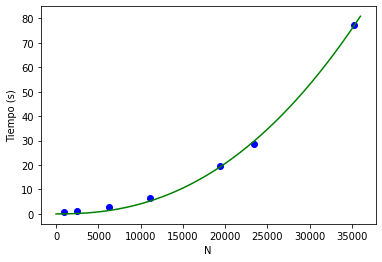

In [2]:
#Caso del algoritmo con spark con 4 iteraciones
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as s
%matplotlib inline

t = [0.641, 1.072, 2.732, 6.522, 19.425, 28.599, 77.453]

N = [1000,2500,6250,11100,19400,23400,35284]



plt.plot(N,t,'bo')

def f(x,b,c):
    return c*x**b

params = s.curve_fit(f,N,t)[0]
x= np.linspace(0,36000,1000)
f= np.vectorize(f)
plt.xlabel('N')  
plt.ylabel('Tiempo (s)')
plt.plot(x,f(x,*params),'g')
#plt.savefig('Spark4.png')

print('Exponente:', params[0], 'Multiplicador:',params[1])

Exponente: 2.243952573761636 Multiplicador: 3.434664618666487e-09


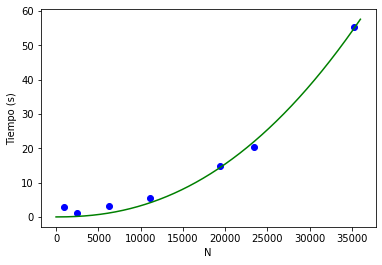

In [3]:
#Caso del algoritmo con spark usando menos iteraciones (3)
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as s
%matplotlib inline

t = [3.004, 1.155, 3.289, 5.413, 14.699, 20.349, 55.39]

N = [1000,2500,6250,11100,19400,23400,35284]


plt.plot(N,t,'bo')

def f(x,b,c):
    return c*x**b

params = s.curve_fit(f,N,t)[0]
x= np.linspace(0,36000,1000)
f= np.vectorize(f)
plt.xlabel('N')  
plt.ylabel('Tiempo (s)')
plt.plot(x,f(x,*params),'g')
#plt.savefig('Spark3.png')
print('Exponente:', params[0], 'Multiplicador:',params[1])


Exponente: 1.1067552193744892 Multiplicador: 6.525307141930047e-05


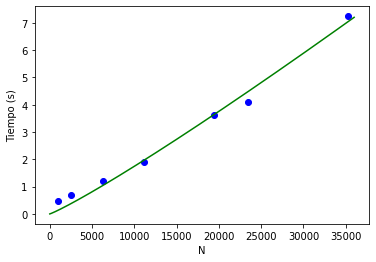

In [4]:
#Caso del algoritmo con spark usando menos iteraciones (2)
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as s
%matplotlib inline

t = [0.482,0.704 ,1.20 ,1.908,3.627 ,4.108 ,7.239]

N = [1000,2500,6250,11100,19400,23400,35284]

plt.plot(N,t,'bo')

def f(x,b,c):
    return c*x**b

params = s.curve_fit(f,N,t)[0]
x= np.linspace(0,36000,1000)
f= np.vectorize(f)
plt.xlabel('N')  
plt.ylabel('Tiempo (s)')
plt.plot(x,f(x,*params),'g')
#plt.savefig('Spark2.png')

print('Exponente:', params[0], 'Multiplicador:',params[1])


Exponente: 3.023454104368964 Multiplicador: 8.49964859968975e-09


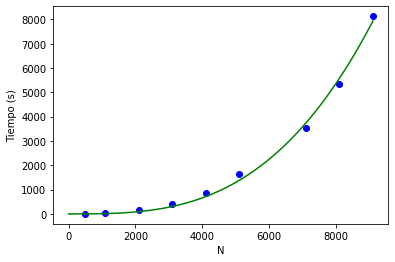

In [5]:
#Caso del algoritmo clasico
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as s
%matplotlib inline

t = [4.22,29.52,154.11,413.07,876.28,1630.92,3546.82,5340.12,8129.85]

N = [500,1100,2100,3100,4100,5100,7100,8100,9100]


plt.plot(N,t,'bo')

def f(x,b,c):
    return c*x**b
params = s.curve_fit(f,N,t)[0]
x= np.linspace(0,9100,1000)
f= np.vectorize(f)
plt.xlabel('N')  
plt.ylabel('Tiempo (s)')
plt.plot(x,f(x,*params),'g')
#plt.savefig('Clasico.png')
print('Exponente:', params[0], 'Multiplicador:',params[1])

In [9]:
#Funcion para trocear el dataset y medir el coste conforme aumenta N

import pandas as pd
import numpy as np

def crear_parte(N):
    archivo = 'cociente_raw_uniform_od.csv'
    df = pd.read_csv(archivo, delimiter=';',names=[0,1,2,3,4])
    shape = df.shape[0]
    df.fillna('', inplace=True)
    contador = 0
    s = list()
    while contador < shape:
        s.append(contador)
        contador = contador +shape/N

    d = df.iloc[s]
    d.to_csv(archivo.split('.')[0]+'_'+str(N)+'.csv', sep = ';', index = False, header=False)


In [2]:
# Definicion de la funcion para hacer varias iteraciones en el algoritmo clásico
from statistics import *
import pandas as pd
import numpy as np

def clasico(extension,it=5):
    df = pd.read_csv('cociente_raw_uniform_od'+extension+'.csv',delimiter=';', names=['numero','apellido', 'nombre', 'fecha','registros'])
    df.fillna('', inplace=True)
    
    def mapeo_desde_df_medicos(x, l = 5):
        datos = x
        for i in range(len(datos)):
            if i == l-1:
                datos[i] = set(eval(datos[i]))
            else:
                datos[i] = set([datos[i]])
        return datos
    
    values = df.values.tolist()
    
    for i in range(len(values)):
        values[i] = mapeo_desde_df_medicos(values[i], l=5)
        
    def match_and_merge(x,factors,distances, excluyentes = 1):
        threshold = 1
        return_list = []
        data = x
        data.sort(key=lambda x: len(x[3]),reverse=True)
        comprobados = []
        contador = 0
        result=dict()
        i=0
        for element in data[:]:
            seguimos = True
            if i not in comprobados:
                result[contador] = (element)
                while seguimos:
                    j=0
                    seguimos = False # Esto es para poder cazar todos, seguimos iterando hasta no pegar nada
                    for element2 in data[:]:
                        if j not in comprobados and distancia(result[contador],element2,factors,distances, excluyentes) <=  threshold:
                            comprobados.append(j)
                            seguimos = True
                            temp = result[contador]
                            for cont in range(len(element2)):
                                temp[cont] = temp[cont].union(element2[cont])
                            result[contador] = (temp)
                        j+=1
                contador+=1
            i+=1
            print(str(round(100*i/len(data),3))+' % completado  ', end = '\r')
        for i in range(len(result)):
            return_list.append(result[i])
        return return_list
    from Levenshtein import distance as L_distance

    #Distancias definidas

    def L_distance_vacios(element1,element2):
        if element1 == '' or element2 == '':
            return 1
        else:
            return L_distance(element1,element2)

    def distancia_levenstein_separando_vacios(element1,element2):
        set1= set(element1.split(' '))
        set2= set(element2.split(' '))
        distancia_temp = [1000]
        if '' in set1 or '' in set2:
            distancia_temp.append(1)
        for element in list(set1):
                for element_2 in list(set2):
                    distancia_temp.append(L_distance_vacios(element,element_2))
        return min(distancia_temp)

    def distancia_para_sets(set1,set2,distance):
        distancia_temp=[1000]
        for element in set1:
                for element2 in set2:
                    distancia_temp.append(distance(element,element2))
        return min(distancia_temp)

    #Distancia global

    def distancia(list_of_sets_1,list_of_sets_2, list_of_factors,list_of_distances, excluyentes = 1):
        distancia = 0

        for i in range(len(list_of_sets_1)-excluyentes):

            '''
            if ('' in list_of_sets_1[i]) or ('' in list_of_sets_2[i]):
                distancia_temp.append(1) #Considero que tener una incognita en un dato es equivalente a un fallo
                                         #Es posible que se junten mas cosas de lo debido al mantener la entrada 
                                         #vacía, pues las diferencias entre conjuntos muy diferentes se acumlan
                                         # ¿Eliminar la entrada vacía de los sets con mas de un elemento?
                                         # ¿Poner 1/factor?
                                         # Dos indefinidos que ajusten a 1 
            '''
            distancia = distancia + distancia_para_sets(list_of_sets_1[i],list_of_sets_2[i],list_of_distances[i])*list_of_factors[i]

        return distancia

    factores_origen = [1,0.25,0.25,0.5] #Colocados en orden de los campos originales
    distancias_origen = [L_distance_vacios,L_distance_vacios, distancia_levenstein_separando_vacios,L_distance_vacios]
    initial_number = len(values)
    multiplicador = 2/3 #a menos mult, mas tiempo de ejecucion y más duplicados se detectan
    factores_origen = [multiplicador*x for x in factores_origen]



    import time
    tiempos = list()
    for j in range(it):
        
        print('-'*50)
        print('Comienzo iteración {} con extensión {}'.format(j+1,extension))

        time1 = time.time()
        result = match_and_merge(values, factores_origen, distancias_origen)
        time2 = time.time()

        final_number = len(result)
        print('Inicialmente había {} entradas'.format(initial_number))
        print('Finalmente hay {} entradas'.format(final_number))
        print('Se han detectado {} entradas erroneas'.format(initial_number-final_number))
        print('Esto es un {} % del total'.format(100*(initial_number-final_number)/initial_number))
        print('El algoritmo ha tardado {} segundos en ejecutarse'.format(time2-time1))
        tiempos.append(time2-time1)
    print('El tiempo medio es {}'.format(mean(tiempos)))
    print('El tiempo medio sin contar el primer elemento es {}'.format(mean(tiempos[1:])))
    print('Los tiempos son ' + str(tiempos))
    print('Fin de las iteraciones para la extension {}'.format(extension))
    print('-'*50)
    return [mean(tiempos),mean(tiempos[1:])]


def multiple_clasico(lista):
    tiempo = list()
    for element in lista:
        result = clasico('_'+str(element))
        if abs(1-result[0]/result[1]<0.05):
            tiempo.append(result[0])
        else:
            tiempo.append(result[1])
    print('El vector de tiempos final es {}'.format(tiempo))
        

In [3]:
#multiple_clasico([500,1100,2100,3100,4100,5100,7100,8100,9100])
multiple_clasico([9100])

--------------------------------------------------
Comienzo iteración 1 con extensión _9100
Inicialmente había 9101 entradas
Finalmente hay 8128 entradas
Se han detectado 973 entradas erroneas
Esto es un 10.691132842544775 % del total
El algoritmo ha tardado 7735.658210992813 segundos en ejecutarse
--------------------------------------------------
Comienzo iteración 2 con extensión _9100
Inicialmente había 9101 entradas
Finalmente hay 8128 entradas
Se han detectado 973 entradas erroneas
Esto es un 10.691132842544775 % del total
El algoritmo ha tardado 9042.240183353424 segundos en ejecutarse
--------------------------------------------------
Comienzo iteración 3 con extensión _9100
Inicialmente había 9101 entradas
Finalmente hay 8128 entradas
Se han detectado 973 entradas erroneas
Esto es un 10.691132842544775 % del total
El algoritmo ha tardado 7909.273649930954 segundos en ejecutarse
--------------------------------------------------
Comienzo iteración 4 con extensión _9100
Inicialm

In [6]:
#Script para crear un dataset multiplicando la información

import pandas as pd

archivo = 'cociente_raw_uniform_od.csv'
df = pd.read_csv(archivo,delimiter=';', names=['numero','apellido', 'nombre', 'fecha','registros'])
df_copy = df.copy()
it = 22
for i in range(it):
    df = df.append(df_copy)
print(len(df))
df.to_csv(archivo.split('.')[0]+'_mult_x_'+str(i+1)+'.csv',sep = ';', index = False, header=False)

811532


Exponente: 1.1871232555460092 Multiplicador: 4.618837707186131e-06 Ordenada: 51.39190418900044


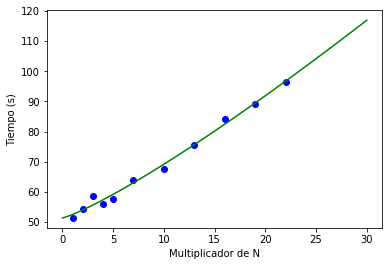

In [6]:
# Analisis de los resultados para ejecución en cluster de spark 1-3-0-2


import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as s
%matplotlib inline
t = [51.41,54.43,58.82,56.07,57.81,63.86,67.66,75.64,84.27,89.05,96.44]

mult_N = [1,2,3,4,5,7,10,13,16,19,22]

N = [35284*x for x in mult_N]

plt.plot(mult_N,t,'bo')

def f(x,b,c,d):
    return c*x**b+d

params = s.curve_fit(f,N,t)[0]
x= np.linspace(0,30,1000)
f= np.vectorize(f)
plt.xlabel('Multiplicador de N')  
plt.ylabel('Tiempo (s)')
plt.plot(x,f(35284*x,*params),'g')
#plt.savefig('Spark_cluster.png')

print('Exponente:', params[0], 'Multiplicador:',params[1],'Ordenada:',params[2])
